#                              Machine Predictive Maintenance Classification

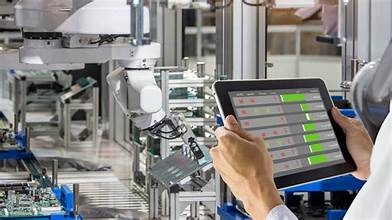

# Loading a dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Importing python inbuilt libraries(numpy, pandas, matplotlib, seaborn)

In [4]:
df = pd.read_csv("C:/Users/nihar/Downloads/archive/predictive_maintenance.csv")

Loading a dataset using read_csv() function present in the pandas library

# Data Exploration

In [5]:
df.head(6)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure


The first 'n' rows of a dataframe as retured using head() function of pandas library.

In [6]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


The last 'n' rows of a dataframe as retured using head() function of pandas library.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Using the info() function of pandas library, the Dtype, Count and Non-Null values of all Columns are displayed for data exploration.

In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


The statistical description of all columns of dataset are analysed.

In [9]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

All the feature names of dataset are extracted.

In [10]:
df.duplicated().sum()

0

The duplicated() function is a pandas library function, that checks for duplicate rows in a dataframe.
There are no duplicate rows in the considered dataset.

In [11]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

The isnull() function of pandas, is used to detect missing or null values present in the dataframe.There exists no null values in the dataframe.

In [12]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [13]:
df["Target"].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [14]:
df = df.drop('UDI', axis = 1)

In [15]:
df = df.drop(['Product ID', 'Type'], axis = 1)

In [16]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure


# Data Imputation

In [17]:
object_columns = df.select_dtypes(include = 'object').columns.tolist()
numerical_columns = df.select_dtypes(include = ['int','float']).columns.tolist()
print("Object Columns: ",object_columns)
print("Numerical Columns: ",numerical_columns)

Object Columns:  ['Failure Type']
Numerical Columns:  ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


The object and numerical datatype columns are printed using select_dtypes() and 

In [18]:
df.nunique()

Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Target                       2
Failure Type                 6
dtype: int64

# Data Visualization

Countplot: Failure Type


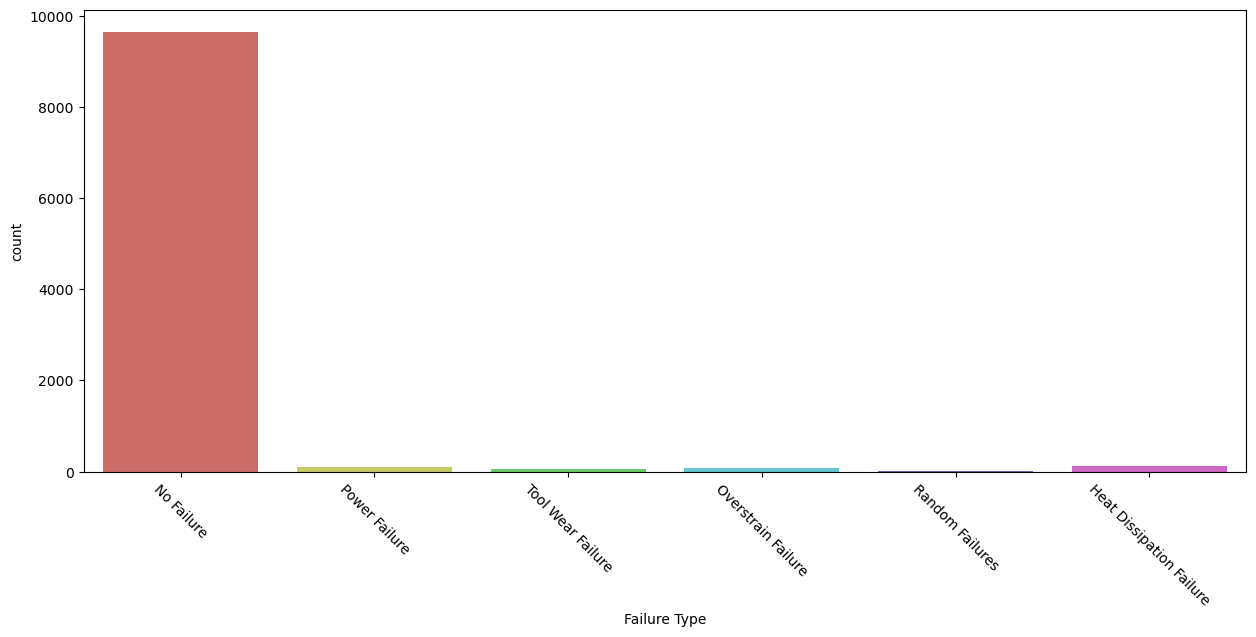

In [20]:
for i in object_columns:
    print('Countplot:', i)
    plt.figure(figsize=(15,6))
    sn.countplot(x = df[i], data = df, palette = 'hls')
    plt.xticks(rotation= -45)
    plt.show()
    print('\n')

Boxplot: Air temperature [K]


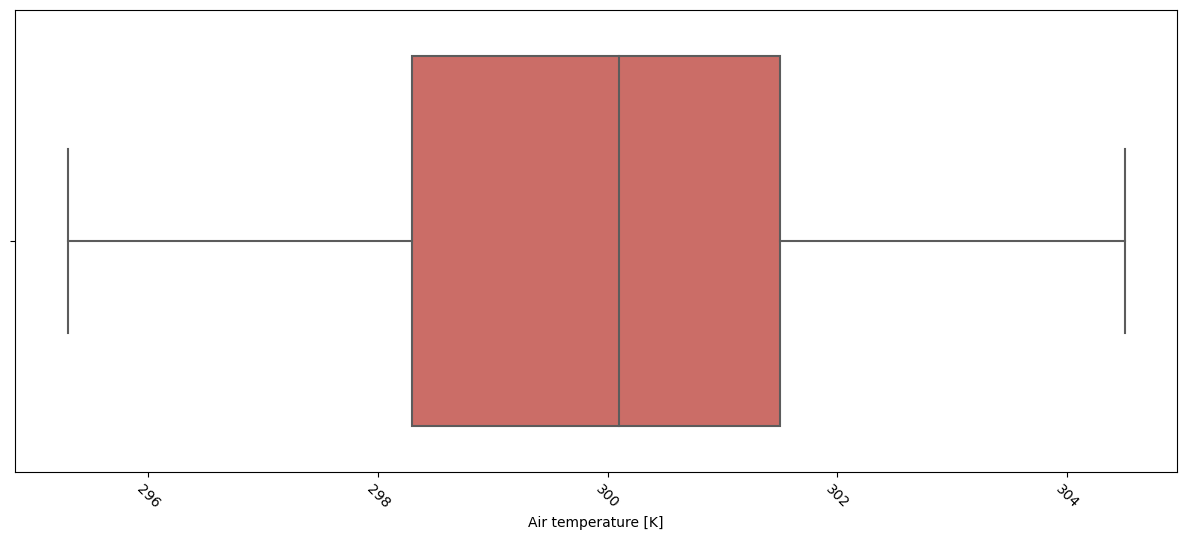



Boxplot: Process temperature [K]


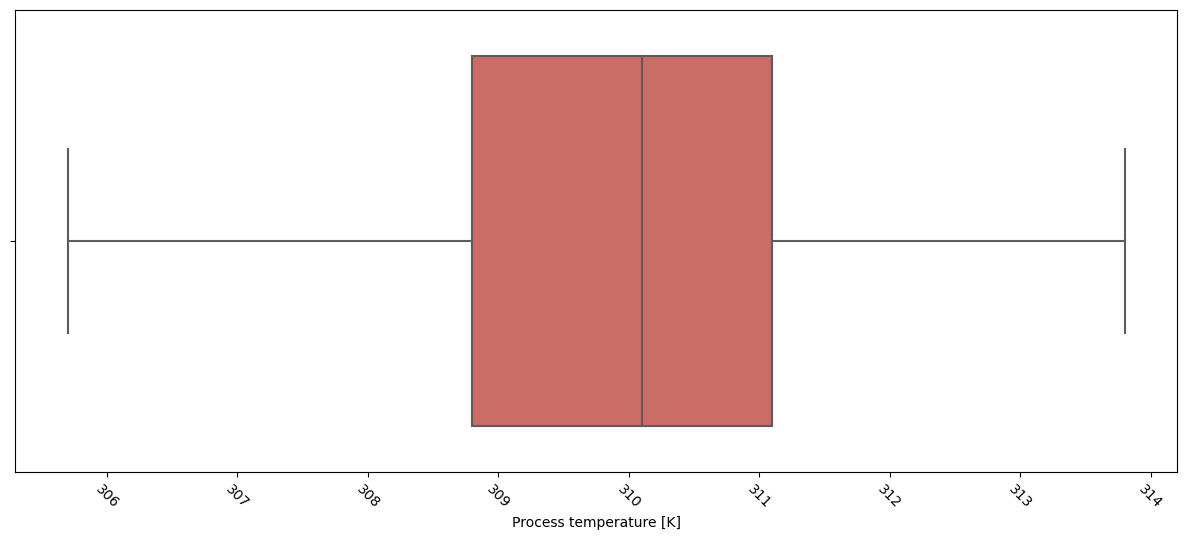



Boxplot: Rotational speed [rpm]


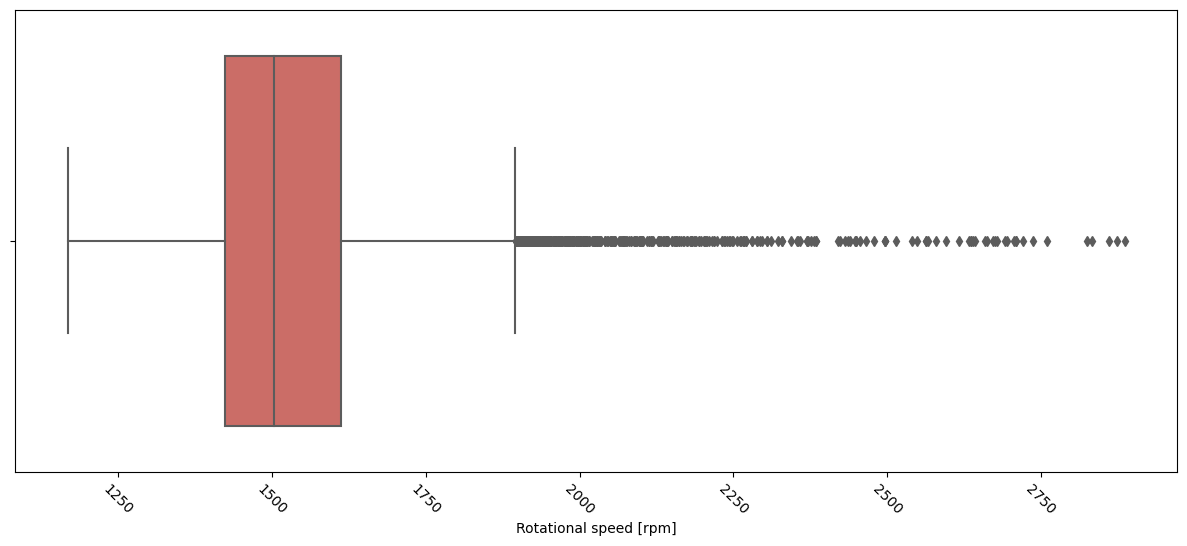



Boxplot: Torque [Nm]


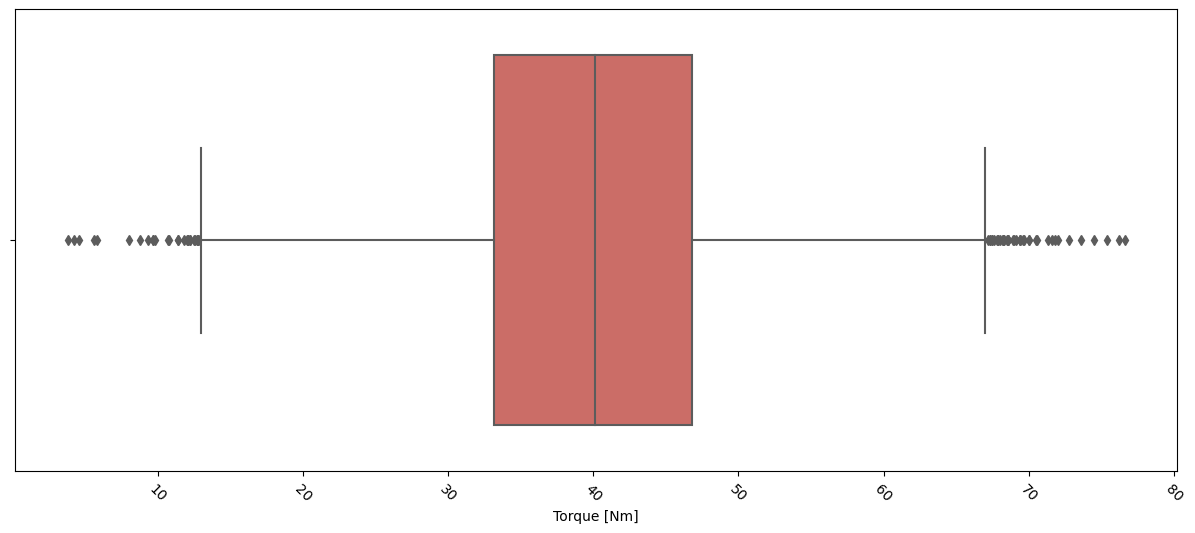



Boxplot: Tool wear [min]


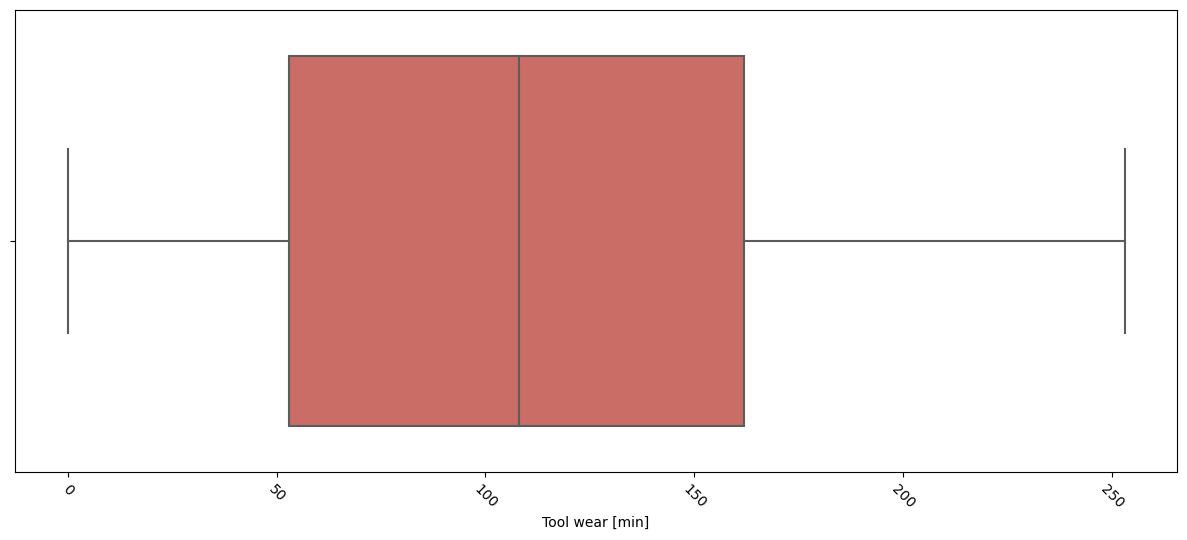



Boxplot: Target


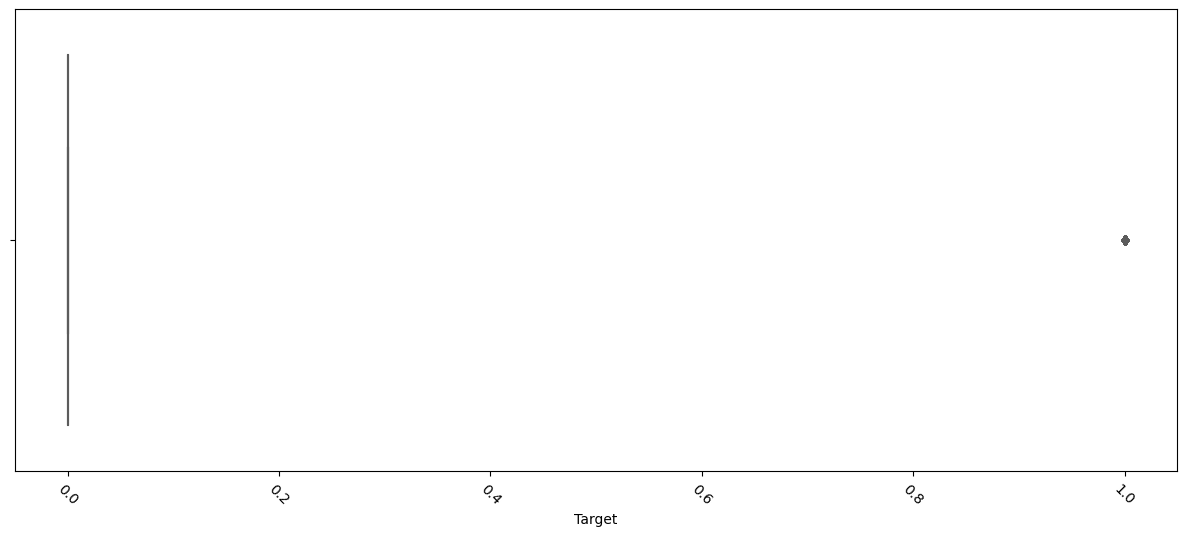

In [21]:
for i in numerical_columns:
    print('Boxplot:', i)
    plt.figure(figsize=(15,6))
    sn.boxplot(x = df[i], data = df, palette = 'hls')
    plt.xticks(rotation= -45)
    plt.show()
    print('\n')

C:\Users\nihar\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


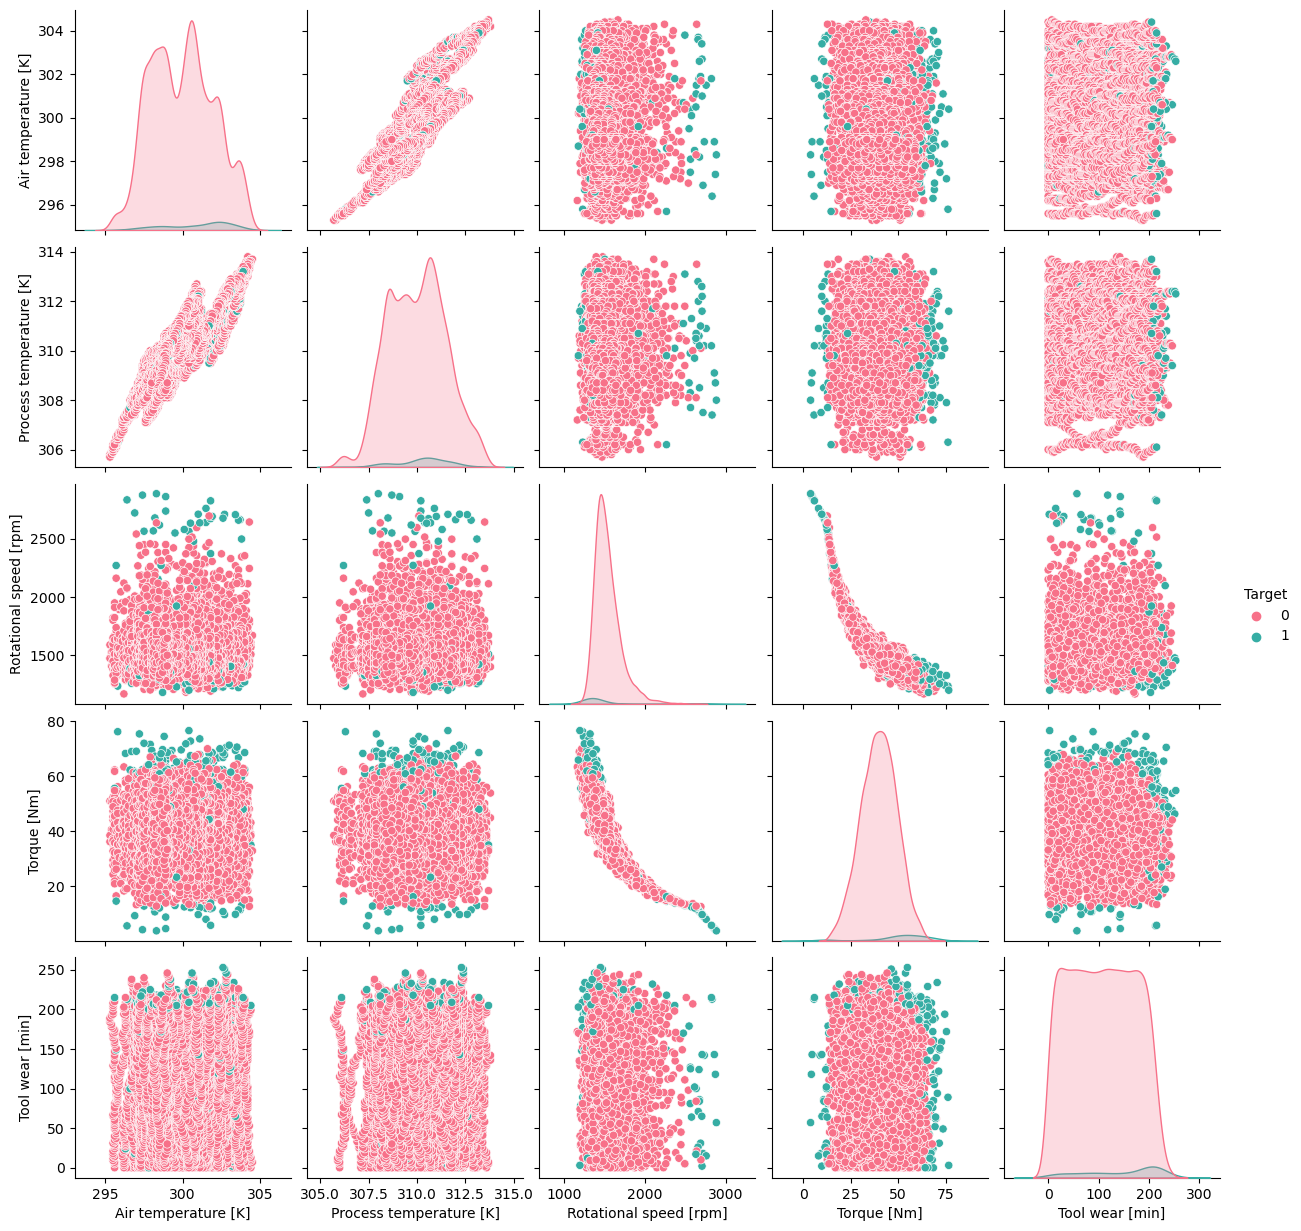

In [22]:
sn.pairplot(df,hue="Target",palette="husl")

In [28]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure
9996,298.9,308.4,1632,31.8,17,0,No Failure
9997,299.0,308.6,1645,33.4,22,0,No Failure
9998,299.0,308.7,1408,48.5,25,0,No Failure


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
X = df.drop(["Target", "Failure Type"], axis = 1)

In [30]:
y = df.Target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
lr_model = LogisticRegression()

In [33]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = lr_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)

In [36]:
print("Accuracy of the Logistic Regression model is: ",accuracy)

Accuracy of the Logistic Regression model is:  0.9725


In [38]:
dt_model = DecisionTreeClassifier()

In [39]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred1 = dt_model.predict(X_test)

In [42]:
accuracy1 = accuracy_score(y_test, y_pred1)

In [43]:
print("Accuracy of the Decision Tree Classifier is: ",accuracy1)

Accuracy of the Decision Tree Classifier is:  0.98
